In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests, os, time, io
from PIL import Image
from tqdm.notebook import tqdm

sns.set(style="whitegrid", context="notebook")

# DATA FETCHER

In [2]:
#DATA_FETCHER.IPNYB

# ROOT_DIR = "/content/"
# EXCEL_FILE_NAME = "train(1).xlsx"
# EXCEL_PATH = os.path.join(ROOT_DIR, EXCEL_FILE_NAME)
# IMAGE_FOLDER = os.path.join(ROOT_DIR, "images")
# os.makedirs(IMAGE_FOLDER, exist_ok=True)

# df = pd.read_excel(EXCEL_PATH)[["lat", "long"]]
# df['image_path'] = [os.path.join(IMAGE_FOLDER, f"{i}.png") for i in df.index]

# print("Testing first 5 images...")
# for idx in tqdm(range(5)):
#     path = df.at[idx, 'image_path']
#     if os.path.exists(path):
#         print(f"Skip {idx}")
#         continue

#     row = df.iloc[idx]
#     lat, lon = row['lat'], row['long']

#     bbox = f"{lon-0.002},{lat-0.002},{lon+0.002},{lat+0.002}"
#     url = f"https://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox={bbox}&bboxSR=4326&size=512,512&format=png&f=image"

#     try:
#         r = requests.get(url, timeout=20)
#         img = Image.open(io.BytesIO(r.content))
#         img.save(path)
#         print(f"YE {idx}: {lat:.4f},{lon:.4f}")
#     except Exception as e:
#         print(f"NO {idx}: {e}")

#     time.sleep(1)

# df.to_csv("/content/train_with_images.csv", index=False)
# print("train_with_images.csv ready!")


In [3]:
# QUICK TEST
# import os
# print("Image 0 exists:", os.path.exists("/content/images/0.png"))


In [4]:
# ROOT_DIR = "/content/"
# EXCEL_FILE_NAME = "test2.xlsx"
# EXCEL_PATH = os.path.join(ROOT_DIR, EXCEL_FILE_NAME)
# IMAGE_FOLDER = "/content/images_test"
# os.makedirs(IMAGE_FOLDER, exist_ok=True)

# df = pd.read_excel(EXCEL_PATH)[["lat", "long"]]
# df['image_path'] = [os.path.join(IMAGE_FOLDER, f"{i}.png") for i in df.index]

# print("Testing first 5 images...")
# for idx in tqdm(range(5)):
#     path = df.at[idx, 'image_path']
#     if os.path.exists(path):
#         print(f"Skip {idx}")
#         continue

#     row = df.iloc[idx]
#     lat, lon = row['lat'], row['long']

#     bbox = f"{lon-0.002},{lat-0.002},{lon+0.002},{lat+0.002}"
#     url = f"https://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox={bbox}&bboxSR=4326&size=512,512&format=png&f=image"

#     try:
#         r = requests.get(url, timeout=20)
#         img = Image.open(io.BytesIO(r.content))
#         img.save(path)
#         print(f"YES {idx}: {lat:.4f},{lon:.4f}")
#     except Exception as e:
#         print(f"NO {idx}: {e}")

#     time.sleep(1)

# df.to_csv("/content/test_with_images.csv", index=False)
# print("test_with_images.csv ready!")


In [5]:
# train_path = "/content/train(1).xlsx"
# test_path = "/content/test2.xlsx"

# df_train = pd.read_csv('/content/train_with_images.csv')
# df_test = pd.read_csv('/content/test_with_images.csv')
# df_train['image_path'] = '/content/images/' + df_train.index.astype(str) + '.png'
# df_test['image_path'] = '/content/images_test/' + df_test.index.astype(str) + '.png'

# from PIL import Image
# import matplotlib.pyplot as plt
# print("Paths exist:", os.path.exists(df_train.image_path[0]))
# img = Image.open(df_train.image_path[0])
# plt.figure(figsize=(8,8))
# plt.imshow(img)
# plt.title("Satellite Image Ready!")
# plt.axis('off')
# plt.show()
# print("Images ready for CNN!")


# PREPROCESSING

In [6]:
train_path = "/content/train(1).xlsx"
test_path = "/content/test2.xlsx"

df_train = pd.read_excel(train_path)
df_test = pd.read_excel(test_path)

df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [7]:
df_train.shape, df_test.shape

((16209, 21), (5404, 20))

In [8]:
df_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df_train.info()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [10]:
df_test.info()
df_test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5404 non-null   int64  
 1   date           5404 non-null   object 
 2   bedrooms       5404 non-null   int64  
 3   bathrooms      5404 non-null   float64
 4   sqft_living    5404 non-null   int64  
 5   sqft_lot       5404 non-null   int64  
 6   floors         5404 non-null   float64
 7   waterfront     5404 non-null   int64  
 8   view           5404 non-null   int64  
 9   condition      5404 non-null   int64  
 10  grade          5404 non-null   int64  
 11  sqft_above     5404 non-null   int64  
 12  sqft_basement  5404 non-null   int64  
 13  yr_built       5404 non-null   int64  
 14  yr_renovated   5404 non-null   int64  
 15  zipcode        5404 non-null   int64  
 16  lat            5404 non-null   float64
 17  long           5404 non-null   float64
 18  sqft_liv

,0
id,0
date,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16209.0,4.575771e+09,2.874661e+09,1.000102e+06,2.123049e+09,3.904950e+09,7.304301e+09,9.900000e+09
price,16209.0,5.374703e+05,3.603036e+05,7.500000e+04,3.200000e+05,4.500000e+05,6.400000e+05,7.700000e+06
bedrooms,16209.0,3.367820e+00,9.332701e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,16209.0,2.113054e+00,7.652419e-01,0.000000e+00,1.500000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,16209.0,2.073275e+03,9.070095e+02,2.900000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.205000e+04
sqft_lot,16209.0,1.486767e+04,3.882570e+04,5.200000e+02,5.004000e+03,7.599000e+03,1.063100e+04,1.164794e+06
floors,16209.0,1.498828e+00,5.430321e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,16209.0,6.971436e-03,8.320614e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,16209.0,2.342526e-01,7.631515e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,16209.0,3.407860e+00,6.515529e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [12]:

print("df_train columns:", df_train.columns.tolist())
print("\nFirst 3 rows:")
df_train.head(3)


df_train columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

First 3 rows:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455


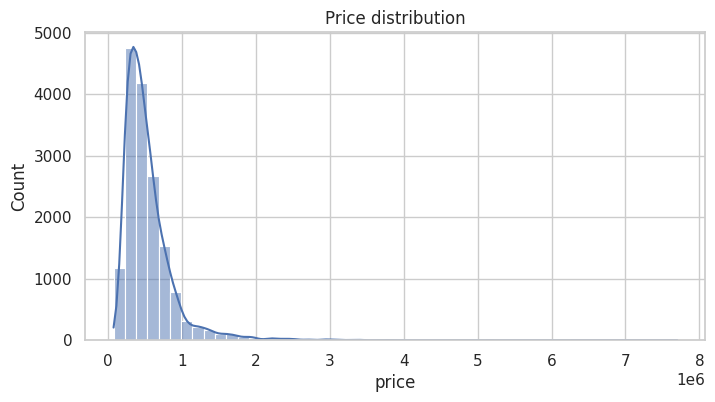

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df_train["price"], bins=50, kde=True)
plt.title("Price distribution")
plt.show()

In [14]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns

corr = df_train[numeric_cols].corr()["price"].sort_values(ascending=False)
corr

,price
price,1.000000
sqft_living,0.700933
grade,0.664266
sqft_above,0.602648
sqft_living15,0.581781
bathrooms,0.525487
view,0.390534
sqft_basement,0.320301
lat,0.310008
bedrooms,0.304454


In [15]:
cols_to_drop = ["id"]  # we keep date & zipcode for now (they can be useful)

df_train_clean = df_train.drop(columns=cols_to_drop)
df_test_clean = df_test.drop(columns=cols_to_drop, errors="ignore")

df_train_clean.columns, df_test_clean.columns


(Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
        'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'],
       dtype='object'),
 Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'],
       dtype='object'))

In [16]:
df_train_clean["date"] = pd.to_datetime(df_train_clean["date"])
df_test_clean["date"] = pd.to_datetime(df_test_clean["date"])

for df_ in [df_train_clean, df_test_clean]:
    df_["sale_year"] = df_["date"].dt.year
    df_["sale_month"] = df_["date"].dt.month

# Now drop original date if you like
df_train_clean = df_train_clean.drop(columns=["date"])
df_test_clean = df_test_clean.drop(columns=["date"])

df_train_clean.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,268643,4,2.25,1810,9240,2.0,0,0,3,7,...,0,1961,0,98055,47.4362,-122.187,1660,9240,2015,5
1,245000,3,2.50,1600,2788,2.0,0,0,4,7,...,0,1992,0,98031,47.4034,-122.187,1720,3605,2014,7
2,200000,4,2.50,1720,8638,2.0,0,0,3,8,...,0,1994,0,98003,47.2704,-122.313,1870,7455,2015,1
3,352499,2,2.25,1240,705,2.0,0,0,3,7,...,90,2009,0,98027,47.5321,-122.073,1240,750,2015,4
4,232000,3,2.00,1280,13356,1.0,0,0,3,7,...,0,1994,0,98042,47.3715,-122.074,1590,8071,2014,12


In [17]:
df_train_clean.isna().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
grade,0


In [18]:
df_test_clean.isna().sum()

,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
grade,0
sqft_above,0


In [19]:
target_col = "price"

X = df_train_clean.drop(columns=[target_col])
y = df_train_clean[target_col]

X.shape, y.shape

((16209, 20), (16209,))

In [20]:
processed_train_path = "/content/train_processed.csv"
processed_test_path = "/content/test_processed.csv"

df_train_clean.to_csv(processed_train_path, index=False)
df_test_clean.to_csv(processed_test_path, index=False)

processed_train_path, processed_test_path

('/content/train_processed.csv', '/content/test_processed.csv')

In [21]:
df_train_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_year', 'sale_month'],
      dtype='object')

## **Random Forest (Baseline Tabular Model)**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [23]:
feature_cols = [col for col in df_train_clean.columns if col != "price"]

X = df_train_clean[feature_cols]
y = df_train_clean["price"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_val.shape

((12967, 20), (3242, 20))

In [24]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [25]:
y_val_pred = rf.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

rmse, r2

(np.float64(128825.1069607839), 0.8677496854599551)

In [26]:
y_log = np.log1p(y)  # log(1 + price)

X_train, X_val, y_train, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

rf_log = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
)

rf_log.fit(X_train, y_train)

y_val_pred_log = rf_log.predict(X_val)
# Convert back to price space
y_val_pred_price = np.expm1(y_val_pred_log)
y_val_price = np.expm1(y_val)

mse_log = mean_squared_error(y_val_price, y_val_pred_price)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_val_price, y_val_pred_price)

rmse_log, r2_log


(np.float64(133573.41479550535), 0.8578209042447565)

log transform not good.

In [27]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
import os
path = "/content/drive/MyDrive/images"
files = os.listdir(path)
print(f"Total files: {len(files)}")
print("First 10:", files[:20])

Total files: 16209
First 10: ['15209.png', '15210.png', '15211.png', '15212.png', '15213.png', '15214.png', '15215.png', '15216.png', '15217.png', '15218.png', '15219.png', '15220.png', '15221.png', '15222.png', '15223.png', '15224.png', '15225.png', '15226.png', '15227.png', '15228.png']


In [29]:
IMAGE_BASE_PATH = "/content/drive/MyDrive/images"
print(f"Images folder: {IMAGE_BASE_PATH}")


Images folder: /content/drive/MyDrive/images


In [30]:
# Since files are 0.png to 16208.png matching train rows
df_train_clean["image_path"] = df_train_clean.index.astype(str) + ".png"
df_train_clean["image_path"] = IMAGE_BASE_PATH + "/" + df_train_clean["image_path"]

df_train_clean[["lat", "long", "image_path"]].head()

,lat,long,image_path
0,47.4362,-122.187,/content/drive/MyDrive/images/0.png
1,47.4034,-122.187,/content/drive/MyDrive/images/1.png
2,47.2704,-122.313,/content/drive/MyDrive/images/2.png
3,47.5321,-122.073,/content/drive/MyDrive/images/3.png
4,47.3715,-122.074,/content/drive/MyDrive/images/4.png


In [31]:
# If test also has images in same folder, or separate folder
df_test_clean["image_path"] = IMAGE_BASE_PATH + "/test_" + df_test_clean.index.astype(str) + ".png"  # adjust if needed

In [32]:
df_train_clean.to_csv("/content/train_with_images.csv", index=False)
df_test_clean.to_csv("/content/test_with_images.csv", index=False)

print("Updated CSVs saved with image_path column!")
df_train_clean[["lat", "long", "image_path"]].head()

Updated CSVs saved with image_path column!


,lat,long,image_path
0,47.4362,-122.187,/content/drive/MyDrive/images/0.png
1,47.4034,-122.187,/content/drive/MyDrive/images/1.png
2,47.2704,-122.313,/content/drive/MyDrive/images/2.png
3,47.5321,-122.073,/content/drive/MyDrive/images/3.png
4,47.3715,-122.074,/content/drive/MyDrive/images/4.png


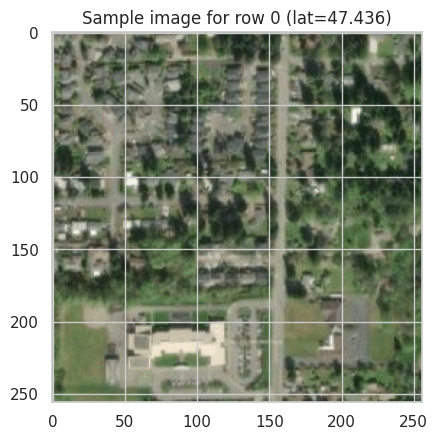

In [33]:
from PIL import Image
import matplotlib.pyplot as plt

sample_path = df_train_clean.iloc[0]["image_path"]
img = Image.open(sample_path)
plt.imshow(img)
plt.title(f"Sample image for row 0 (lat={df_train_clean.iloc[0]['lat']:.3f})")
plt.show()